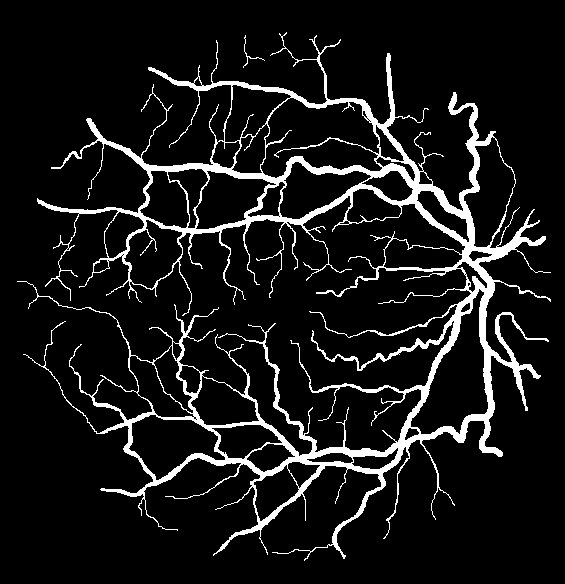

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images

# Loading input segmented retinal image (binary vessel segmentation)
input_image = cv2.imread('/content/22_manual1.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(input_image)

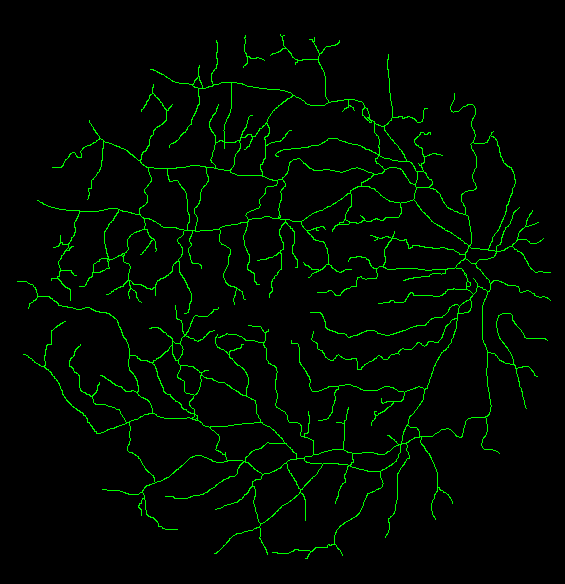

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images

# Load your segmented retinal image (binary vessel segmentation)
retinal_image = cv2.imread('/content/22_manual1.png', cv2.IMREAD_GRAYSCALE)

# Perform skeletonization (centerline extraction)
centerline = cv2.ximgproc.thinning(retinal_image)

# Convert the centerline to a color image
color_centerline_image = cv2.cvtColor(centerline, cv2.COLOR_GRAY2BGR)

# Set the color for the centerline (e.g., green)
color = (0, 255, 0)  # Green in BGR format

# Find the centerline pixels and draw them in the color image
centerline_pixels = np.where(centerline == 255)
color_centerline_image[centerline_pixels] = color

# Show the original segmented image with the centerline in a different color
cv2_imshow(color_centerline_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('color_centerline_image.png', color_centerline_image)

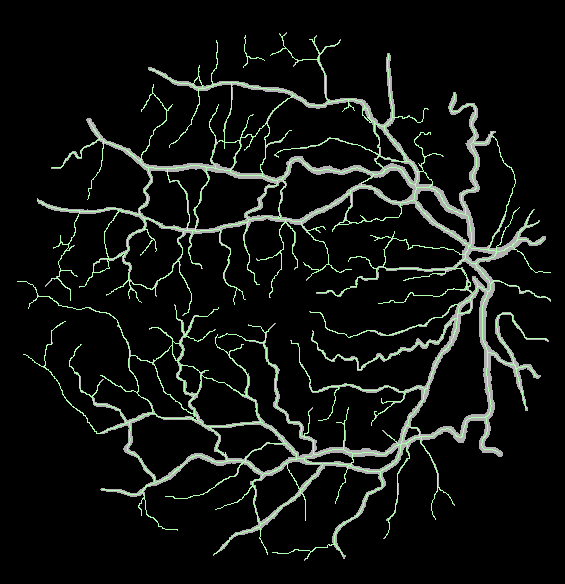

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images

# Load the two images you want to superimpose
image1 = cv2.imread('/content/22_manual1.png')
image2 = cv2.imread('/content/color_centerline_image.png')

# Resize image2 to match the dimensions of image1
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))


# Define the transparency level (alpha) for image2
alpha = 0.3  # You can adjust this value to control the transparency

# Perform the superimposition by blending the images
full_superimposed_image = cv2.addWeighted(image1, 1 - alpha, image2, alpha, 0)

# Display or save the superimposed image
cv2_imshow(full_superimposed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the superimposed image
cv2.imwrite('full_superimposed_image.png', full_superimposed_image)


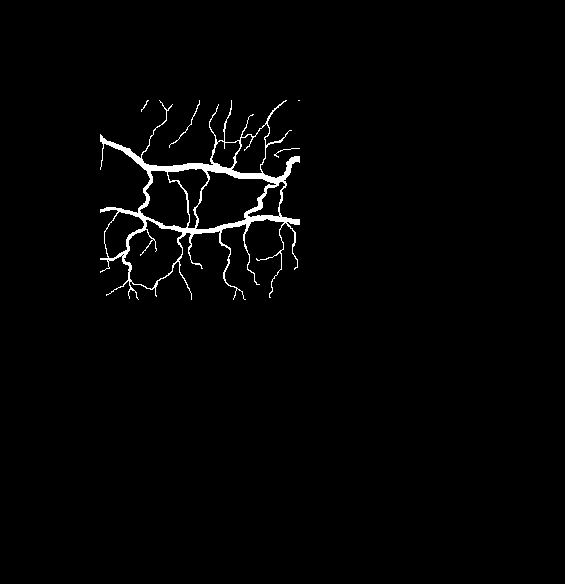

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images

# Load the retinal image
retinal_image = cv2.imread('/content/22_manual1.png')  # Load as grayscale

# Here, we use simple thresholding as an example
_, binary_image = cv2.threshold(retinal_image, 100, 255, cv2.THRESH_BINARY)

# Define the coordinates or boundaries of Zone B (customize this)
zone_b_x1, zone_b_y1, zone_b_x2, zone_b_y2 = 100, 100, 300, 300

# Create a binary mask for Zone B
zone_b_mask = np.zeros_like(retinal_image)
zone_b_mask[zone_b_y1:zone_b_y2, zone_b_x1:zone_b_x2] = 255

# Apply the Zone B mask to the segmented vessels
vessels_in_zone_b = cv2.bitwise_and(binary_image, zone_b_mask)

# Display or save the result
cv2_imshow(vessels_in_zone_b)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('ROI_Image.png', vessels_in_zone_b)


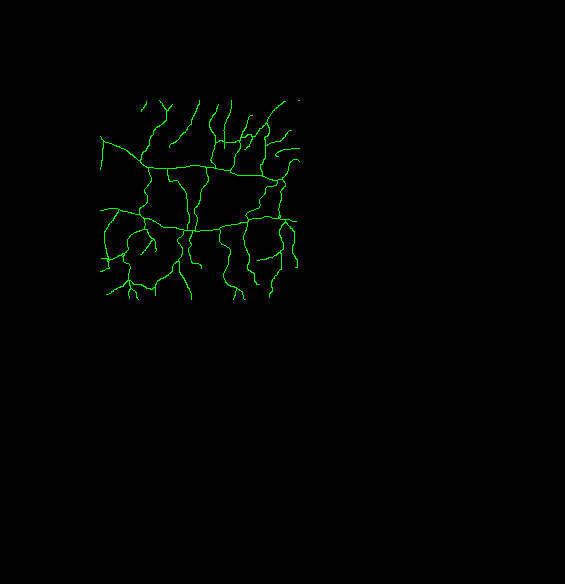

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images

# Load your segmented retinal image (binary vessel segmentation)
retinal_image = cv2.imread('/content/ROI_Image.png', cv2.IMREAD_GRAYSCALE)

# Perform skeletonization (centerline extraction)
centerline = cv2.ximgproc.thinning(retinal_image)

# Convert the centerline to a color image
centerline_color = cv2.cvtColor(centerline, cv2.COLOR_GRAY2BGR)

# Set the color for the centerline (e.g., green)
color = (0, 255, 0)  # Green in BGR format

# Find the centerline pixels and draw them in the color image
centerline_pixels = np.where(centerline == 255)
centerline_color[centerline_pixels] = color

# Show the original segmented image with the centerline in a different color
cv2_imshow(centerline_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('ROI_centerline_color.png', centerline_color)

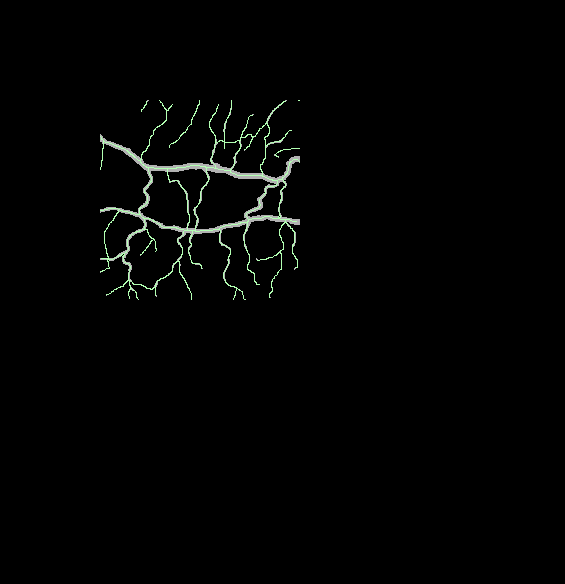

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images

# Load the two images you want to superimpose
image1 = cv2.imread('/content/ROI_Image.png')
image2 = cv2.imread('/content/ROI_centerline_color.png')

# Resize image2 to match the dimensions of image1
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Define the transparency level (alpha) for image2
alpha = 0.3  # You can adjust this value to control the transparency

# Perform the superimposition by blending the images
roi_superimposed_image = cv2.addWeighted(image1, 1 - alpha, image2, alpha, 0)

# Display or save the superimposed image
cv2_imshow(roi_superimposed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the superimposed image
cv2.imwrite('ROI_superimposed_image.png', roi_superimposed_image)

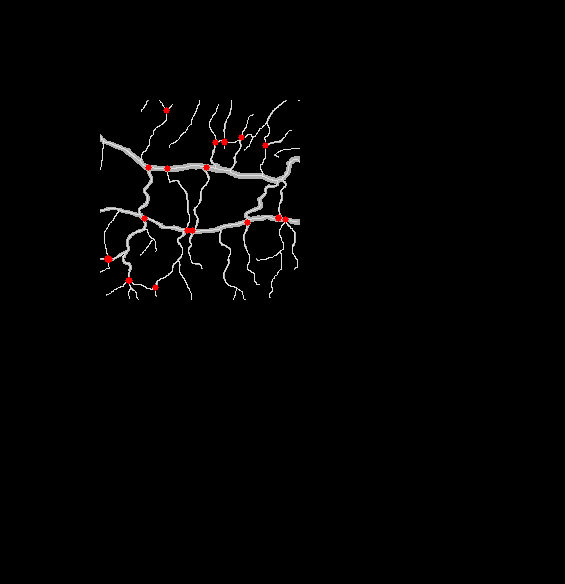

In [ ]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, remove_small_objects
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images

# Load the grayscale retinal vessel segmented image
image_path = '/content/ROI_superimposed_image.png'  # Replace this with the path to your image file
retina_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary vessel segmented image
_, binary_retina_image = cv2.threshold(retina_image, 128, 255, cv2.THRESH_BINARY)

# Skeletonize the binary image
skeleton = skeletonize(binary_retina_image > 0)

# Optional: Prune small branches from the skeleton
min_size = 10
pruned_skeleton = remove_small_objects(skeleton, min_size=min_size)

# Function to find junction points in the skeleton
def find_junction_points(skeleton):
    junction_points = []
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    for i in range(1, skeleton.shape[0] - 1):
        for j in range(1, skeleton.shape[1] - 1):
            if skeleton[i, j] == 1:
                neighbors = [skeleton[i + di, j + dj] for di, dj in directions]
                if np.sum(neighbors) > 2:
                    junction_points.append((j, i))  # Note: Reversed (j, i) due to (x, y) vs (row, col) convention

    return junction_points

# Find junction points
junction_points = find_junction_points(pruned_skeleton)

# Draw junction points on the original grayscale image
image_with_junctions = cv2.cvtColor(retina_image, cv2.COLOR_GRAY2BGR)
for point in junction_points:
    cv2.circle(image_with_junctions, (point[0], point[1]), 3, (0, 0, 255), -1)  # Red dots for junction points


# Display the image with junction points
cv2_imshow(image_with_junctions)
cv2.waitKey(0)
cv2.destroyAllWindows()


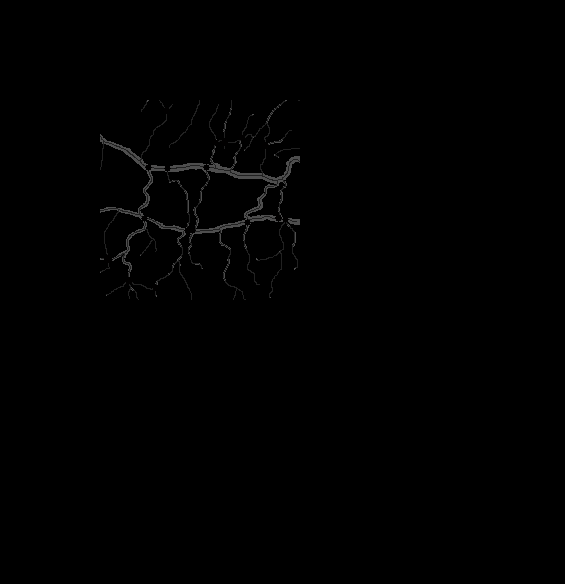

True

In [ ]:
import cv2
import numpy as np
from skimage.morphology import skeletonize, remove_small_objects
from google.colab.patches import cv2_imshow
image_path = '/content/ROI_superimposed_image.png'
retina_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary_retina_image = cv2.threshold(retina_image, 128, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(binary_retina_image > 0)
min_size = 10
pruned_skeleton = remove_small_objects(skeleton, min_size=min_size)
def find_junction_points(skeleton):
    junction_points = []
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    for i in range(1, skeleton.shape[0] - 1):
        for j in range(1, skeleton.shape[1] - 1):
            if skeleton[i, j] == 1:
                neighbors = [skeleton[i + di, j + dj] for di, dj in directions]
                if np.sum(neighbors) > 2:
                    junction_points.append((j, i))
    return junction_points
junction_points = find_junction_points(pruned_skeleton)
image_with_junctions = cv2.cvtColor(retina_image, cv2.COLOR_GRAY2BGR)
for point in junction_points:
    cv2.circle(image_with_junctions, (point[0], point[1]), 3, (0, 0, 255), -1)
min_branch_length = 20
pruned_skeleton = remove_small_objects(image_with_junctions, min_size=min_branch_length)
pruned_skeleton_image = pruned_skeleton.astype(np.uint8) * 255
cv2_imshow(pruned_skeleton_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('Pruned_Vessel_image.png', pruned_skeleton_image)

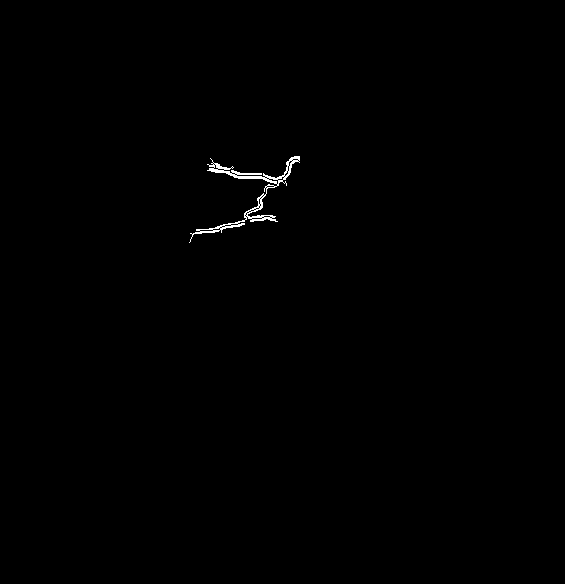

True

In [ ]:
import cv2
import numpy as np
from skimage import morphology, measure
import matplotlib.pyplot as plt

# Load the segmented binary image (assuming it's already thresholded)
segmented_image = cv2.imread('/content/Pruned_Vessel_image.png', cv2.IMREAD_GRAYSCALE)

# Use scikit-image's label function for connected component analysis
labeled_image = morphology.label(segmented_image)

# Measure properties of labeled regions
regions = measure.regionprops(labeled_image)

# Find the label corresponding to the longest connected component
max_area_label = max(regions, key=lambda x: x.area).label

# Create an image containing only the longest connected component
longest_component_image = np.zeros_like(labeled_image)
longest_component_image[labeled_image == max_area_label] = 1



# Display or save the result as needed
cv2_imshow(longest_component_image.astype(np.uint8) * 255)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('longest_component_image.png', longest_component_image.astype(np.uint8) * 255)


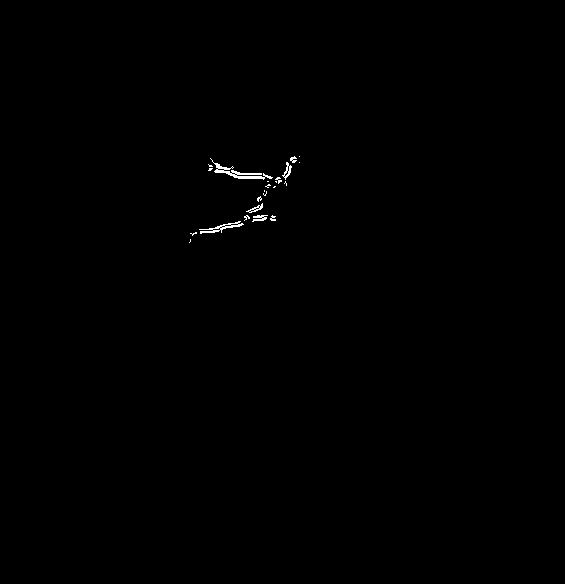

True

In [ ]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images

img = cv2.imread('/content/longest_component_image.png', cv2.IMREAD_GRAYSCALE)
# convert image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(img)

'''
args:
img - Input image, it should be grayscale and float32 type.
blockSize - It is the size of neighbourhood considered for corner detection
ksize - Aperture parameter of Sobel derivative used.
k - Harris detector free parameter in the equation.
'''
dst = cv2.cornerHarris(gray, 9, 5, 0.04)
# result is dilated for marking the corners
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_thresh = cv2.threshold(dst, 0.32*dst.max(), 255, 0)[1]
img_thresh = np.uint8(img_thresh)

# get the matrix with the x and y locations of each centroid
centroids = cv2.connectedComponentsWithStats(img_thresh)[3]

stop_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# refine corner coordinates to subpixel accuracy
corners = cv2.cornerSubPix(gray, np.float32(centroids), (5,5), (-1,-1), stop_criteria)
for i in range(1, len(corners)):
    #print(corners[i])
    cv2.circle(gray, (int(corners[i,0]), int(corners[i,1])), 5, (0,255,0), 2)

cv2_imshow(gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

# cv2.imwrite('gray.png', gray)

cv2.imwrite('junctions.png', gray)

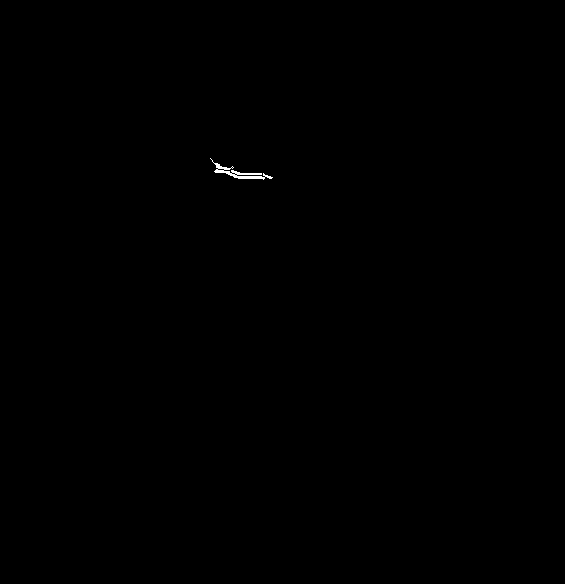

True

In [ ]:
import cv2
import numpy as np
from skimage import morphology, measure
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# Load the segmented binary image (assuming it's already thresholded)
segmented_image = cv2.imread('/content/junctions.png', cv2.IMREAD_GRAYSCALE)

# Use scikit-image's label function for connected component analysis
labeled_image = morphology.label(segmented_image)

# Measure properties of labeled regions
regions = measure.regionprops(labeled_image)

# Find the label corresponding to the longest connected component
max_area_label = max(regions, key=lambda x: x.area).label

# Create an image containing only the longest connected component
longest_component_image = np.zeros_like(labeled_image)
longest_component_image[labeled_image == max_area_label] = 1


# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Longest Connected Component')
# plt.imshow(longest_component_image, cmap='gray')
# plt.axis('off')

# plt.show()

# Display the result
cv2_imshow((longest_component_image * 255).astype(np.uint8))

# Save the result as an image
cv2.imwrite('Final_longest_component_image.png', longest_component_image.astype(np.uint8) * 255)


# Display or save the result as needed
# cv2_imshow(segmented_image)
# cv2_imshow(longest_component_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.imwrite('longest_component_image.png', longest_component_image)


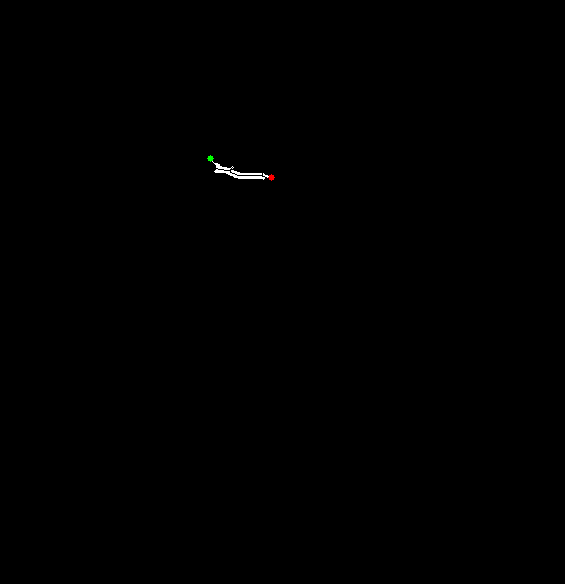

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Assuming you have the pruned vessel image
pruned_vessel_image = cv2.imread('/content/Final_longest_component_image.png', cv2.IMREAD_GRAYSCALE)

# Skeletonize the pruned vessel image
skeletonized_vessel = cv2.ximgproc.thinning(pruned_vessel_image)

# Find the coordinates of the endpoints of the skeleton
pixels_array = np.column_stack(np.where(skeletonized_vessel == 255))

# Extract the first and last endpoint as start and end points
start_point = tuple(pixels_array[0][::-1])  # Reverse the order for OpenCV's (x, y) convention
end_point = tuple(pixels_array[-1][::-1])   # Reverse the order for OpenCV's (x, y) convention

# Mark start and end points on the image
marked_image = cv2.cvtColor(pruned_vessel_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored lines
cv2.line(marked_image, start_point, start_point, (0, 255, 0), 5)  # Green line for start point
cv2.line(marked_image, end_point, end_point, (0, 0, 255), 5)      # Red line for end point


# Display the marked image
cv2_imshow(marked_image)

# # Save the marked image
cv2.imwrite('start_end_component_image_marked.png', marked_image)


In [ ]:
pixels_array

array([[158, 210],
       [159, 211],
       [160, 212],
       [161, 212],
       [162, 213],
       [163, 214],
       [163, 215],
       [163, 216],
       [164, 216],
       [165, 217],
       [166, 218],
       [166, 232],
       [167, 218],
       [167, 219],
       [167, 220],
       [167, 221],
       [167, 222],
       [167, 223],
       [167, 224],
       [167, 231],
       [167, 233],
       [168, 218],
       [168, 224],
       [168, 225],
       [168, 226],
       [168, 227],
       [168, 228],
       [168, 229],
       [168, 230],
       [168, 232],
       [169, 217],
       [169, 224],
       [170, 217],
       [170, 223],
       [171, 217],
       [171, 218],
       [171, 219],
       [171, 220],
       [171, 221],
       [171, 222],
       [171, 223],
       [171, 224],
       [171, 225],
       [171, 226],
       [171, 232],
       [171, 233],
       [171, 234],
       [171, 235],
       [172, 227],
       [172, 228],
       [172, 232],
       [172, 235],
       [172,

In [ ]:
print("Start Point Coordinates: ", pixels_array[0])
print("End Point Coordinates: ", pixels_array[-1])

Start Point Coordinates:  [158 210]
End Point Coordinates:  [177 271]


# **Analyzing Intensity Profile for Single line and Calculating Width**

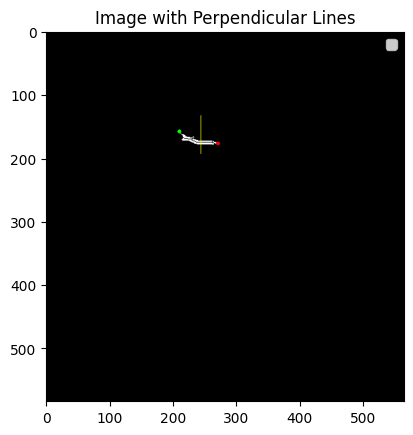

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_perpendicular_line(image, point, length_lower=20, length_upper=40):
    # Create a copy of the input image to avoid modifying the original
    img_with_line = np.copy(image)

    # Extract x and y coordinates of the point
    x, y = point

    # Calculate the endpoint of the perpendicular line in the lower half
    x_lower = int(x + length_lower * np.cos(np.pi / 2))  # perpendicular line angle is pi/2 (90 degrees)
    y_lower = int(y + length_lower * np.sin(np.pi / 2))

    # Calculate the endpoint of the perpendicular line in the upper half
    x_upper = int(x + length_upper * np.cos(-np.pi / 2))  # perpendicular line angle is -pi/2 (-90 degrees)
    y_upper = int(y + length_upper * np.sin(-np.pi / 2))

    # Draw the lines on the image
    cv2.line(img_with_line, (x_upper, y_upper), (x_lower, y_lower), color=(0, 255, 255), thickness=1)  # BGR color format, here using red (0, 0, 255)


    return img_with_line

# Example image
image_path = '/content/start_end_component_image_marked.png'
img = cv2.imread(image_path)

# Example point
point_of_interest = (244, 173)

# Draw perpendicular lines on the image at the given point with different lengths for upper and lower halves
result_image = draw_perpendicular_line(img, point_of_interest, length_lower=20, length_upper=40)


# Display the result
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
# plt.scatter(point_of_interest[0], point_of_interest[1], c='red', marker='o', label='Point of Interest')
plt.legend()
plt.title('Image with Perpendicular Lines')
plt.show()
cv2.imwrite('Image with Perpendicular Lines.png', result_image)



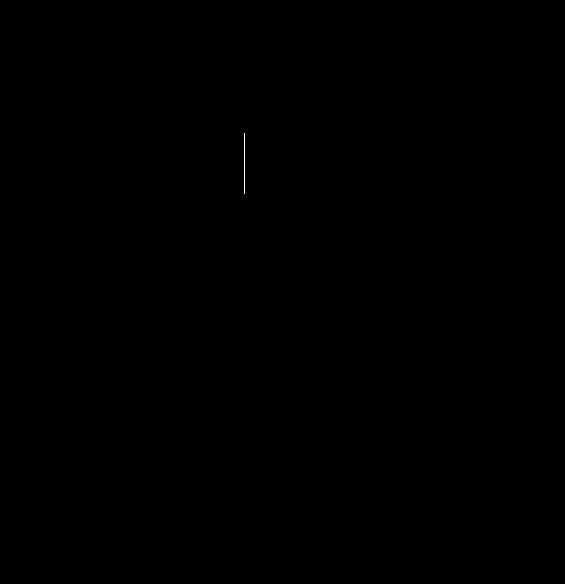

(61, 2)
Coordinates of the line profile:
[133 244]
[134 244]
[135 244]
[136 244]
[137 244]
[138 244]
[139 244]
[140 244]
[141 244]
[142 244]
[143 244]
[144 244]
[145 244]
[146 244]
[147 244]
[148 244]
[149 244]
[150 244]
[151 244]
[152 244]
[153 244]
[154 244]
[155 244]
[156 244]
[157 244]
[158 244]
[159 244]
[160 244]
[161 244]
[162 244]
[163 244]
[164 244]
[165 244]
[166 244]
[167 244]
[168 244]
[169 244]
[170 244]
[171 244]
[172 244]
[173 244]
[174 244]
[175 244]
[176 244]
[177 244]
[178 244]
[179 244]
[180 244]
[181 244]
[182 244]
[183 244]
[184 244]
[185 244]
[186 244]
[187 244]
[188 244]
[189 244]
[190 244]
[191 244]
[192 244]
[193 244]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to draw a line segment on the image
def draw_perpendicular_line(image, point, length_lower=20, length_upper=40):
    # Create a copy of the input image to avoid modifying the original
    img_with_line = np.copy(image)

    # Extract x and y coordinates of the point
    x, y = point

    # Calculate the endpoint of the perpendicular line in the lower half
    x_lower = int(x + length_lower * np.cos(np.pi / 2))  # perpendicular line angle is pi/2 (90 degrees)
    y_lower = int(y + length_lower * np.sin(np.pi / 2))

    # Calculate the endpoint of the perpendicular line in the upper half
    x_upper = int(x + length_upper * np.cos(-np.pi / 2))  # perpendicular line angle is -pi/2 (-90 degrees)
    y_upper = int(y + length_upper * np.sin(-np.pi / 2))

    # Draw the lines on the image
    cv2.line(img_with_line, (x_upper, y_upper), (x_lower, y_lower), color=(255, 0, 255), thickness=1)  # BGR color format, here using red (0, 0, 255)

    return img_with_line, (x, y), (x_lower, y_lower), (x_upper, y_upper)

# Function to find edges on the specified line using Canny edge detection
def find_and_mark_edges(image, line_start, line_end):
    # Create a mask for the line
    mask = np.zeros_like(image[:, :, 0], dtype=np.uint8)
    cv2.line(mask, line_start, line_end, color=255, thickness=1)

    # Convert the image to grayscale for Canny edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection only on the line using the mask
    edges_on_line = cv2.bitwise_and(gray, gray, mask=mask)
    edges_on_line = cv2.Canny(image, 50, 150)

    # Find non-zero points on the edges
    edge_points = np.column_stack(np.where(mask > 0))

    # Draw yellow circles on the original image at the edge points
    img_with_circles = np.copy(image)
    for edge_point in edge_points:
        cv2.circle(img_with_circles, tuple(edge_point[::-1]), 1, (0, 255, 255), -1)  # BGR color format, here using yellow (0, 255, 255)

    return img_with_circles, edges_on_line, mask

# Example image
image_path = '/content/Final_longest_component_image.png'
img = cv2.imread(image_path)

# Example point
point_of_interest = (244, 173)

# Draw perpendicular lines on the image
result_image, start_point, end_point_lower, end_point_upper = draw_perpendicular_line(img, point_of_interest, length_lower=20, length_upper=40)

# Find and mark edges on the specified line
result_with_circles, edges_on_line, mask = find_and_mark_edges(img, end_point_upper, end_point_lower)
cv2_imshow(mask)
# cv2_imshow(edges_on_line)
# intensity_profile = np.sum(mask, axis=1)
# plt.plot(intensity_profile)
# plt.title('Intensity Profile')
# plt.xlabel('Pixel Position')
# plt.ylabel('Intensity')
# plt.show()

coordinates = np.column_stack(np.where(mask > 0))
print(coordinates.shape)


# Print the coordinates
print("Coordinates of the line profile:")
for coord in coordinates:
    print(coord)




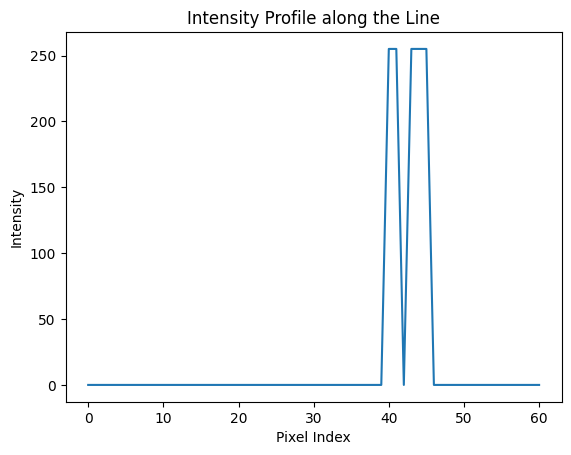

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/Final_longest_component_image.png'
vessel_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Replace these with the actual coordinates variable you have
# coordinates = np.column_stack(np.where(vessel_image > 0))

# Check intensity values and store in a new stack
new_stack = []
intensity_profile = []
for coord in coordinates:
    x, y = coord[1], coord[0]  # OpenCV uses (row, column) format
    intensity = vessel_image[y, x]
    intensity_profile.append(intensity)
    # if vessel_image[y, x] > 0:
    #     intensity = vessel_image[y, x]
    #     intensity_profile.append(intensity)
    #     new_stack.append(coord)

# Print the first and last coordinates of the new stack
# if len(new_stack) > 0:
#     first_coordinate = new_stack[0]
#     last_coordinate = new_stack[-1]
#     print("First Coordinate:", first_coordinate)
#     print("Last Coordinate:", last_coordinate)
# else:
#     print("No coordinates found with intensity greater than 0.")

# Plot the intensity profile
plt.plot(intensity_profile)
plt.title('Intensity Profile along the Line')
plt.xlabel('Pixel Index')
plt.ylabel('Intensity')
plt.show()


In [ ]:
import cv2
import numpy as np

# Load the image
image_path = '/content/Final_longest_component_image.png'
vessel_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Replace these with the actual coordinates variable you have
# coordinates = np.column_stack(np.where(vessel_image > 0))

# Check intensity values and store in a new stack
new_stack = []
for coord in coordinates:
    x, y = coord[1], coord[0]  # OpenCV uses (row, column) format
    if vessel_image[y, x] > 0:
        new_stack.append(coord)

# Print the first and last coordinates of the new stack
if len(new_stack) > 0:
    first_coordinate = new_stack[0]
    last_coordinate = new_stack[-1]
    print("First Coordinate:", first_coordinate)
    print("Last Coordinate:", last_coordinate)
else:
    print("No coordinates found with intensity greater than 0.")


First Coordinate: [173 244]
Last Coordinate: [178 244]


Euclidean Distance Between Two Edges is:  5.0


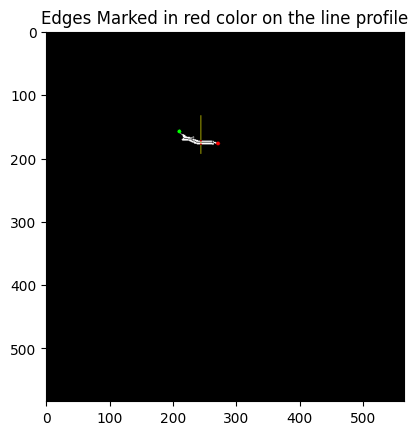

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Load the BGR image
image_path = '/content/Image with Perpendicular Lines.png'
bgr_image = cv2.imread(image_path)

# Convert BGR to RGB
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

# Replace these with the actual coordinates
first_coordinate = [173, 244]
last_coordinate = [178, 244]

# Mark circles on the RGB image
marked_image = rgb_image.copy()
cv2.line(marked_image, tuple(first_coordinate[::-1]), tuple(first_coordinate[::-1]), (255, 0, 0), 2)
cv2.line(marked_image, tuple(last_coordinate[::-1]), tuple(last_coordinate[::-1]), (255, 0, 0), 2)
# cv2.circle(marked_image, tuple(first_coordinate[::-1]), 1, (0, 255, 0), -1)  # Mark first coordinate in green
# cv2.circle(marked_image, tuple(last_coordinate[::-1]), 1, (0, 0, 255), -1)   # Mark last coordinate in red

# Calculate Euclidean distance
distance = math.sqrt((last_coordinate[0] - first_coordinate[0])**2 + (last_coordinate[1] - first_coordinate[1])**2)

# Display the Euclidean distance
print("Euclidean Distance Between Two Edges is: ", distance)

# Display the marked RGB image
plt.imshow(marked_image)
plt.title('Edges Marked in red color on the line profile')
plt.show()


# **Analyzing Intensity Profile for Multiple lines and Calculating the Mean Width for all Line Profiles**

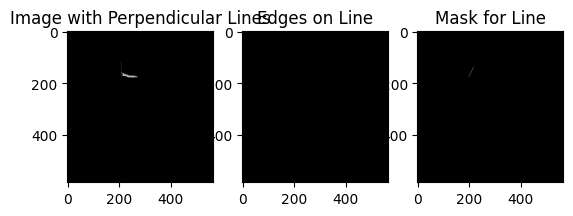

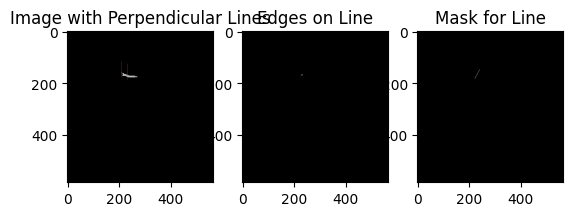

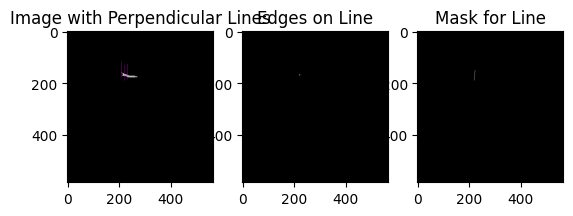

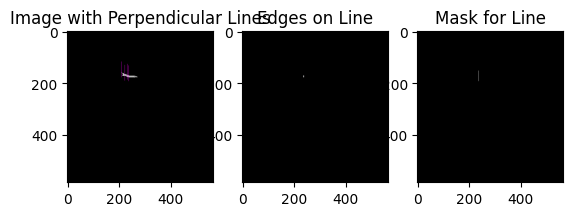

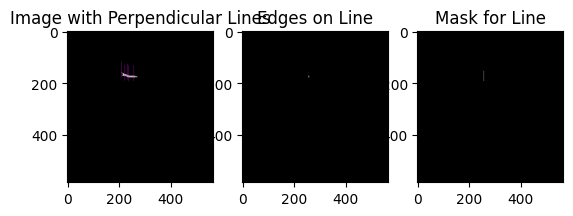

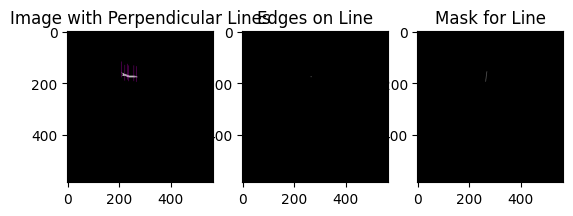

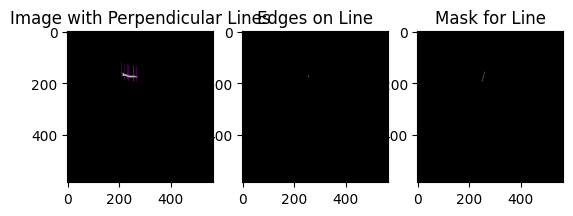

Image with perpendicular lines saved at: /content/image_with_perpendicular_lines.png


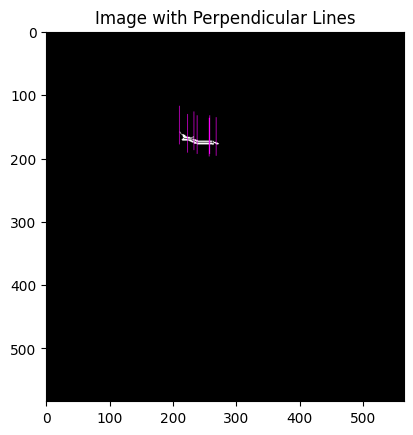

Coordinates for Line 1:
[139 218]
[140 218]
[141 217]
[142 217]
[143 216]
[144 216]
[145 215]
[146 215]
[147 214]
[148 214]
[149 213]
[150 213]
[151 212]
[152 212]
[153 212]
[154 211]
[155 211]
[156 210]
[157 210]
[158 209]
[159 209]
[160 208]
[161 208]
[162 207]
[163 207]
[164 207]
[165 206]
[166 206]
[167 205]
[168 205]
[169 204]
[170 204]
[171 203]
[172 203]
[173 202]
[174 202]
[175 201]
[176 201]
Coordinates for Line 2:
[149 242]
[150 241]
[151 241]
[152 240]
[153 240]
[154 239]
[155 239]
[156 238]
[157 238]
[158 237]
[159 237]
[160 236]
[161 235]
[162 235]
[163 234]
[164 234]
[165 233]
[166 233]
[167 232]
[168 232]
[169 231]
[170 231]
[171 230]
[172 230]
[173 229]
[174 228]
[175 228]
[176 227]
[177 227]
[178 226]
[179 226]
[180 225]
[181 225]
[182 224]
[183 224]
[184 223]
Coordinates for Line 3:
[151 224]
[152 224]
[153 224]
[154 224]
[155 224]
[156 224]
[157 224]
[158 223]
[159 223]
[160 223]
[161 223]
[162 223]
[163 223]
[164 223]
[165 223]
[166 223]
[167 223]
[168 223]
[169 223

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to draw a line segment on the image
def draw_perpendicular_line(image, point, length_lower=20, length_upper=40):
    # Create a copy of the input image to avoid modifying the original
    img_with_line = np.copy(image)

    # Extract x and y coordinates of the point
    x, y = point

    # Calculate the endpoint of the perpendicular line in the lower half
    x_lower = int(x + length_lower * np.cos(np.pi / 2))  # perpendicular line angle is pi/2 (90 degrees)
    y_lower = int(y + length_lower * np.sin(np.pi / 2))

    # Calculate the endpoint of the perpendicular line in the upper half
    x_upper = int(x + length_upper * np.cos(-np.pi / 2))  # perpendicular line angle is -pi/2 (-90 degrees)
    y_upper = int(y + length_upper * np.sin(-np.pi / 2))

    # Draw the lines on the image
    cv2.line(img_with_line, (x_upper, y_upper), (x_lower, y_lower), color=(255, 0, 255), thickness=1)  # BGR color format, here using red (0, 0, 255)

    return img_with_line, (x, y), (x_lower, y_lower), (x_upper, y_upper)

# Function to find edges on the specified line using Canny edge detection
def find_and_mark_edges_on_line(image, line_start, line_end):
    # Create a mask for the line
    mask = np.zeros_like(image[:, :, 0], dtype=np.uint8)
    cv2.line(mask, line_start, line_end, color=255, thickness=1)

    # Convert the image to grayscale for Canny edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection only on the line using the mask
    edges_on_line = cv2.bitwise_and(gray, gray, mask=mask)
    edges_on_line = cv2.Canny(edges_on_line, 50, 150)

    # Find non-zero points on the edges
    edge_points = np.column_stack(np.where(mask > 0))

    return edges_on_line, mask, edge_points

# Example image
image_path = '/content/Final_longest_component_image.png'
img = cv2.imread(image_path)

# Set the interval for perpendicular lines
interval = 20

# Create a copy of the original image for drawing lines
image_with_lines = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Store coordinates for all lines
all_coordinates = []

# Draw perpendicular lines at regular intervals
for i in range(0, len(pixels_array), interval):
    # Calculate the perpendicular line points
    current_point = tuple(pixels_array[i][::-1])
    angle = np.arctan2(current_point[1] - point_of_interest[1], current_point[0] - point_of_interest[0])
    perpendicular_length = 20  # Adjust as needed
    initial_point = (
        int(current_point[0] + perpendicular_length * np.cos(angle - np.pi/2)),
        int(current_point[1] + perpendicular_length * np.sin(angle - np.pi/2))
    )
    end_point = (
        int(current_point[0] + perpendicular_length * np.cos(angle + np.pi/2)),
        int(current_point[1] + perpendicular_length * np.sin(angle + np.pi/2))
    )

    # Draw the perpendicular line on the image
    image_with_lines, _, _, _ = draw_perpendicular_line(image_with_lines, current_point, length_lower=20, length_upper=40)

    # Find and mark edges on the current line
    edges_on_line, mask, edge_points = find_and_mark_edges_on_line(img, initial_point, end_point)

    # Display the results for each line
    plt.subplot(1, 3, 1), plt.imshow(image_with_lines), plt.title('Image with Perpendicular Lines')
    plt.subplot(1, 3, 2), plt.imshow(edges_on_line, cmap='gray'), plt.title('Edges on Line')
    plt.subplot(1, 3, 3), plt.imshow(mask, cmap='gray'), plt.title('Mask for Line')
    plt.show()

    # Store coordinates for the current line
    all_coordinates.append(edge_points)

# Save the image with perpendicular lines
output_image_path = '/content/image_with_perpendicular_lines.png'
cv2.imwrite(output_image_path, cv2.cvtColor(image_with_lines, cv2.COLOR_RGB2BGR))
print(f"Image with perpendicular lines saved at: {output_image_path}")

# Display the image with all perpendicular lines
plt.imshow(image_with_lines)
plt.title('Image with Perpendicular Lines')
plt.show()

# Display all coordinates
for i, coordinates in enumerate(all_coordinates):
    print(f"Coordinates for Line {i + 1}:")
    for coord in coordinates:
        print(coord)


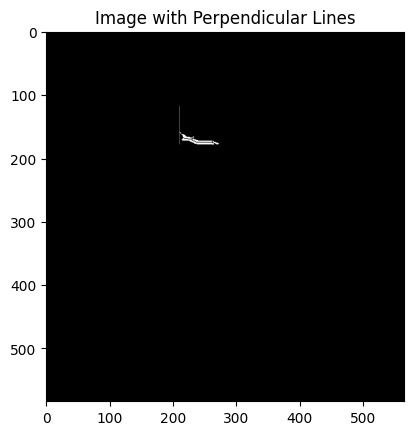

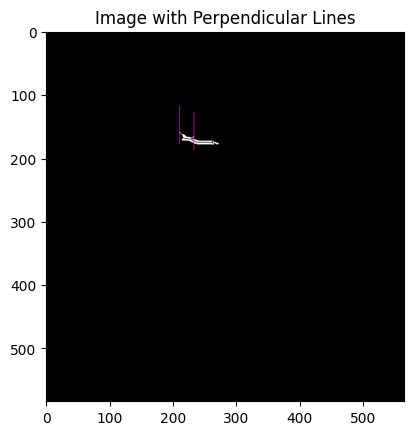

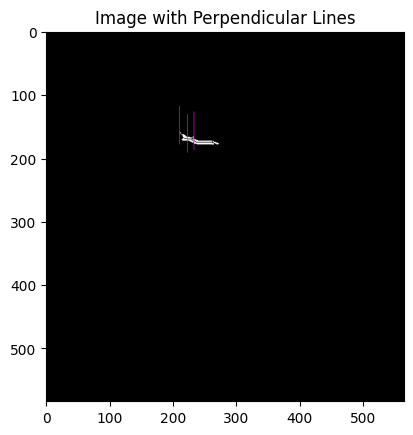

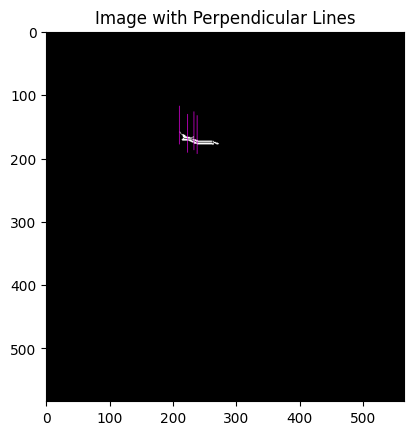

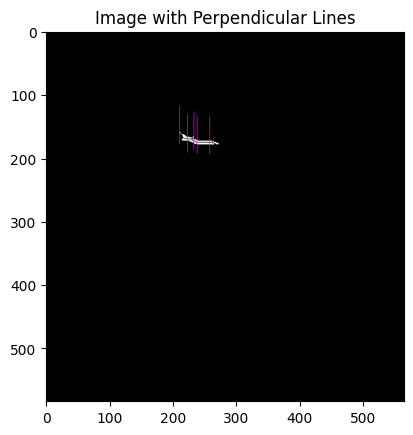

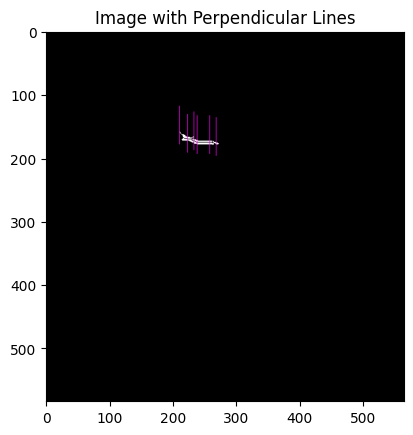

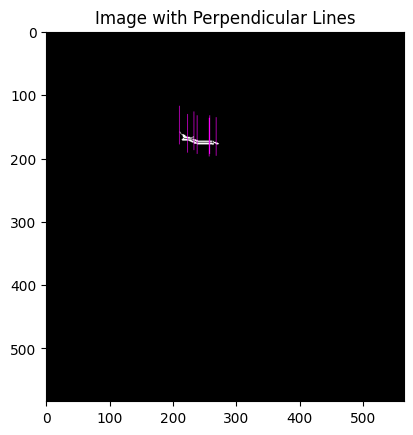

Coordinates for Line 1:
[148 227]
[149 225]
[149 226]
[150 223]
[150 224]
[151 221]
[151 222]
[152 219]
[152 220]
[153 217]
[153 218]
[154 216]
[155 214]
[155 215]
[156 212]
[156 213]
[157 210]
[157 211]
[158 208]
[158 209]
[159 206]
[159 207]
[160 204]
[160 205]
[161 203]
[162 201]
[162 202]
[163 199]
[163 200]
[164 197]
[164 198]
[165 195]
[165 196]
[166 193]
[166 194]
[167 192]
Coordinates for Line 2:
[159 250]
[159 251]
[160 248]
[160 249]
[161 245]
[161 246]
[161 247]
[162 243]
[162 244]
[163 240]
[163 241]
[163 242]
[164 238]
[164 239]
[165 235]
[165 236]
[165 237]
[166 233]
[166 234]
[167 231]
[167 232]
[168 228]
[168 229]
[168 230]
[169 226]
[169 227]
[170 223]
[170 224]
[170 225]
[171 221]
[171 222]
[172 218]
[172 219]
[172 220]
[173 216]
[173 217]
[174 214]
[174 215]
Coordinates for Line 3:
[162 239]
[162 240]
[163 237]
[163 238]
[164 235]
[164 236]
[165 233]
[165 234]
[166 231]
[166 232]
[167 229]
[167 230]
[168 227]
[168 228]
[169 225]
[169 226]
[170 223]
[170 224]
[171 221

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to draw a line segment on the image
def draw_perpendicular_line(image, point, length_lower=20, length_upper=40):
    # Create a copy of the input image to avoid modifying the original
    img_with_line = np.copy(image)

    # Extract x and y coordinates of the point
    x, y = point

    # Calculate the endpoint of the perpendicular line in the lower half
    x_lower = int(x + length_lower * np.cos(np.pi / 2))  # perpendicular line angle is pi/2 (90 degrees)
    y_lower = int(y + length_lower * np.sin(np.pi / 2))

    # Calculate the endpoint of the perpendicular line in the upper half
    x_upper = int(x + length_upper * np.cos(-np.pi / 2))  # perpendicular line angle is -pi/2 (-90 degrees)
    y_upper = int(y + length_upper * np.sin(-np.pi / 2))

    # Draw the lines on the image
    cv2.line(img_with_line, (x_upper, y_upper), (x_lower, y_lower), color=(255, 0, 255), thickness=1)  # BGR color format, here using red (0, 0, 255)

    return img_with_line, (x, y), (x_lower, y_lower), (x_upper, y_upper)

# Function to find edges on the specified line using Canny edge detection
def find_and_mark_edges_on_line(image, line_start, line_end):
    # Create a mask for the line
    mask = np.zeros_like(image[:, :, 0], dtype=np.uint8)
    cv2.line(mask, line_start, line_end, color=255, thickness=1)

    # Convert the image to grayscale for Canny edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection only on the line using the mask
    edges_on_line = cv2.bitwise_and(gray, gray, mask=mask)
    edges_on_line = cv2.Canny(edges_on_line, 50, 150)

    # Find non-zero points on the edges
    edge_points = np.column_stack(np.where(mask > 0))

    return edges_on_line, mask, edge_points

# Example image
image_path = '/content/Final_longest_component_image.png'
img = cv2.imread(image_path)

# Set the interval for perpendicular lines
interval = 20

# Assuming you have an image 'img'
point_of_interest = (img.shape[1] // 2, img.shape[0] // 2)  # Center of the image

# Create a copy of the original image for drawing lines
image_with_lines = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Store coordinates for all lines
all_coordinates = []

# Draw perpendicular lines at regular intervals
for i in range(0, len(pixels_array), interval):
    # Calculate the perpendicular line points
    current_point = tuple(pixels_array[i][::-1])
    angle = np.arctan2(current_point[1] - point_of_interest[1], current_point[0] - point_of_interest[0])
    perpendicular_length = 20  # Adjust as needed
    initial_point = (
        int(current_point[0] + perpendicular_length * np.cos(angle - np.pi/2)),
        int(current_point[1] + perpendicular_length * np.sin(angle - np.pi/2))
    )
    end_point = (
        int(current_point[0] + perpendicular_length * np.cos(angle + np.pi/2)),
        int(current_point[1] + perpendicular_length * np.sin(angle + np.pi/2))
    )

    # Draw the perpendicular line on the image
    image_with_lines, _, _, _ = draw_perpendicular_line(image_with_lines, current_point, length_lower=20, length_upper=40)

    # Find and mark edges on the current line
    edges_on_line, mask, edge_points = find_and_mark_edges_on_line(img, initial_point, end_point)

    # Display the results for each line
    plt.imshow(image_with_lines)
    plt.title('Image with Perpendicular Lines')
    plt.show()

    # Store coordinates for the current line
    all_coordinates.append(edge_points)

# Display all coordinates
for i, coordinates in enumerate(all_coordinates):
    print(f"Coordinates for Line {i + 1}:")
    for coord in coordinates:
        print(coord)


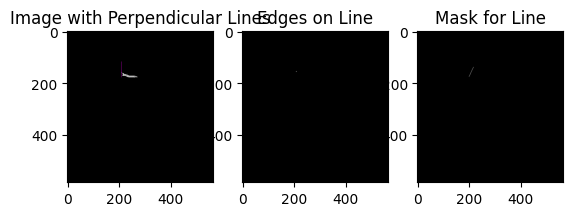

No coordinates found with intensity greater than 0 for Line 1.


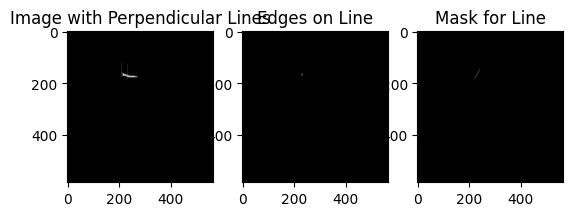

First Coordinate for Line 2: [168 232]
Last Coordinate for Line 2: [174 228]


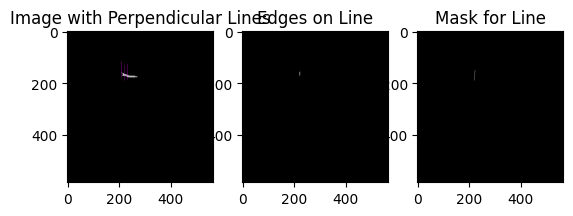

First Coordinate for Line 3: [167 223]
Last Coordinate for Line 3: [172 222]


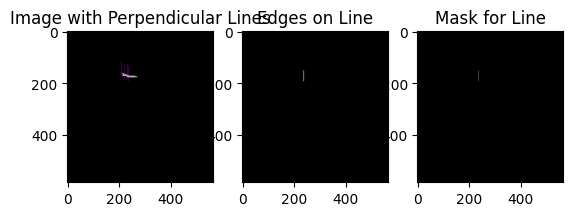

First Coordinate for Line 4: [172 238]
Last Coordinate for Line 4: [178 238]


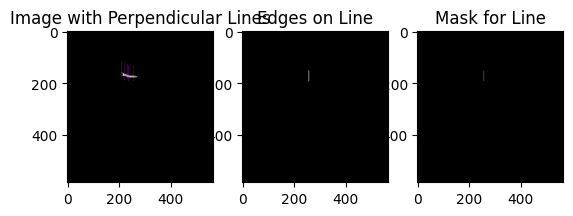

First Coordinate for Line 5: [173 258]
Last Coordinate for Line 5: [178 258]


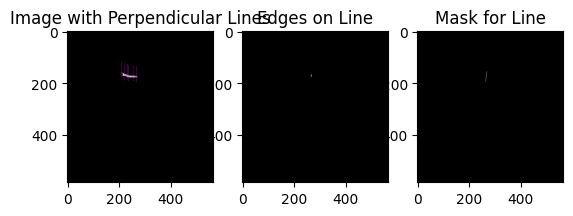

First Coordinate for Line 6: [176 267]
Last Coordinate for Line 6: [177 267]


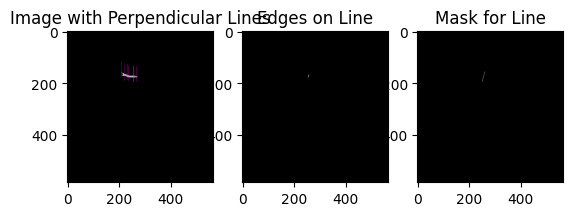

First Coordinate for Line 7: [173 257]
Last Coordinate for Line 7: [178 256]


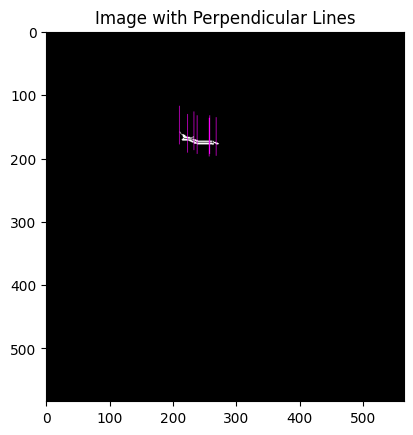

Coordinates for Line 1:
[139 218]
[140 218]
[141 217]
[142 217]
[143 216]
[144 216]
[145 215]
[146 215]
[147 214]
[148 214]
[149 213]
[150 213]
[151 212]
[152 212]
[153 212]
[154 211]
[155 211]
[156 210]
[157 210]
[158 209]
[159 209]
[160 208]
[161 208]
[162 207]
[163 207]
[164 207]
[165 206]
[166 206]
[167 205]
[168 205]
[169 204]
[170 204]
[171 203]
[172 203]
[173 202]
[174 202]
[175 201]
[176 201]
Coordinates for Line 2:
[149 242]
[150 241]
[151 241]
[152 240]
[153 240]
[154 239]
[155 239]
[156 238]
[157 238]
[158 237]
[159 237]
[160 236]
[161 235]
[162 235]
[163 234]
[164 234]
[165 233]
[166 233]
[167 232]
[168 232]
[169 231]
[170 231]
[171 230]
[172 230]
[173 229]
[174 228]
[175 228]
[176 227]
[177 227]
[178 226]
[179 226]
[180 225]
[181 225]
[182 224]
[183 224]
[184 223]
Coordinates for Line 3:
[151 224]
[152 224]
[153 224]
[154 224]
[155 224]
[156 224]
[157 224]
[158 223]
[159 223]
[160 223]
[161 223]
[162 223]
[163 223]
[164 223]
[165 223]
[166 223]
[167 223]
[168 223]
[169 223

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to draw a line segment on the image
def draw_perpendicular_line(image, point, length_lower=20, length_upper=40):
    # Create a copy of the input image to avoid modifying the original
    img_with_line = np.copy(image)

    # Extract x and y coordinates of the point
    x, y = point

    # Calculate the endpoint of the perpendicular line in the lower half
    x_lower = int(x + length_lower * np.cos(np.pi / 2))  # perpendicular line angle is pi/2 (90 degrees)
    y_lower = int(y + length_lower * np.sin(np.pi / 2))

    # Calculate the endpoint of the perpendicular line in the upper half
    x_upper = int(x + length_upper * np.cos(-np.pi / 2))  # perpendicular line angle is -pi/2 (-90 degrees)
    y_upper = int(y + length_upper * np.sin(-np.pi / 2))

    # Draw the lines on the image
    cv2.line(img_with_line, (x_upper, y_upper), (x_lower, y_lower), color=(255, 0, 255), thickness=1)  # BGR color format, here using red (0, 0, 255)

    return img_with_line, (x, y), (x_lower, y_lower), (x_upper, y_upper)

# Function to find edges on the specified line using Canny edge detection
def find_and_mark_edges_on_line(image, line_start, line_end):
    # Create a mask for the line
    mask = np.zeros_like(image[:, :, 0], dtype=np.uint8)
    cv2.line(mask, line_start, line_end, color=255, thickness=1)

    # Convert the image to grayscale for Canny edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection only on the line using the mask
    edges_on_line = cv2.bitwise_and(gray, gray, mask=mask)
    edges_on_line = cv2.Canny(edges_on_line, 50, 150)

    # Find non-zero points on the edges
    edge_points = np.column_stack(np.where(mask > 0))

    return edges_on_line, mask, edge_points

# Load the image
image_path = '/content/Final_longest_component_image.png'
vessel_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set the interval for perpendicular lines
interval = 20

# Create a copy of the original image for drawing lines
image_with_lines = cv2.cvtColor(vessel_image, cv2.COLOR_GRAY2RGB)

# Store coordinates for all lines
all_coordinates = []

# Draw perpendicular lines at regular intervals
for i, line_number in enumerate(range(0, len(pixels_array), interval)):
    # Calculate the perpendicular line points
    current_point = tuple(pixels_array[line_number][::-1])
    angle = np.arctan2(current_point[1] - point_of_interest[1], current_point[0] - point_of_interest[0])
    perpendicular_length = 20  # Adjust as needed
    initial_point = (
        int(current_point[0] + perpendicular_length * np.cos(angle - np.pi/2)),
        int(current_point[1] + perpendicular_length * np.sin(angle - np.pi/2))
    )
    end_point = (
        int(current_point[0] + perpendicular_length * np.cos(angle + np.pi/2)),
        int(current_point[1] + perpendicular_length * np.sin(angle + np.pi/2))
    )

    # Draw the perpendicular line on the image
    image_with_lines, _, _, _ = draw_perpendicular_line(image_with_lines, current_point, length_lower=20, length_upper=40)

    # Find and mark edges on the current line
    edges_on_line, mask, edge_points = find_and_mark_edges_on_line(image_with_lines, initial_point, end_point)

    # Display the results for each line
    plt.subplot(1, 3, 1), plt.imshow(image_with_lines), plt.title('Image with Perpendicular Lines')
    plt.subplot(1, 3, 2), plt.imshow(edges_on_line, cmap='gray'), plt.title('Edges on Line')
    plt.subplot(1, 3, 3), plt.imshow(mask, cmap='gray'), plt.title('Mask for Line')
    plt.show()

    # Check intensity values and store in a new stack for the current line
    new_stack = []
    for coord in edge_points:
        x, y = coord[1], coord[0]  # OpenCV uses (row, column) format
        if vessel_image[y, x] > 0:
            new_stack.append(coord)

    # Print the first and last coordinates for the current line
    if len(new_stack) > 0:
        first_coordinate = new_stack[0]
        last_coordinate = new_stack[-1]
        print(f"First Coordinate for Line {i + 1}:", first_coordinate)
        print(f"Last Coordinate for Line {i + 1}:", last_coordinate)
    else:
        print(f"No coordinates found with intensity greater than 0 for Line {i + 1}.")

    # Store coordinates for the current line
    all_coordinates.append(edge_points)

# Display the image with all perpendicular lines
plt.imshow(image_with_lines)
plt.title('Image with Perpendicular Lines')
plt.show()

# Display all coordinates
for i, coordinates in enumerate(all_coordinates):
    print(f"Coordinates for Line {i + 1}:")
    for coord in coordinates:
        print(coord)


Euclidean Distance between edges for Line 2: 7.211102550927978
Euclidean Distance between edges for Line 3: 5.0990195135927845
Euclidean Distance between edges for Line 4: 6.0
Euclidean Distance between edges for Line 5: 5.0
Euclidean Distance between edges for Line 6: 1.0
Euclidean Distance between edges for Line 7: 5.0990195135927845

Mean Euclidean Distance: 4.90



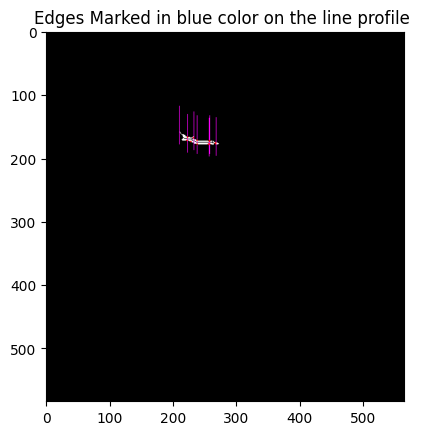

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the BGR image
image_path = '/content/image_with_perpendicular_lines.png'
bgr_image = cv2.imread(image_path)

# Replace these with the actual coordinates
coordinates = [
    ([168, 232], [174, 228]),
    ([167, 223], [172, 222]),
    ([172, 238], [178, 238]),
    ([173, 258], [178, 258]),
    ([176, 267], [177, 267]),
    ([173, 257], [178, 256])
]

# Calculate Euclidean distances for each line
distances = []
for i, (first_coord, last_coord) in enumerate(coordinates):
    distance = np.linalg.norm(np.array(last_coord) - np.array(first_coord))
    distances.append(distance)
    print(f"Euclidean Distance between edges for Line {i + 2}: {distance}")

# Calculate the mean Euclidean distance
mean_distance = np.mean(distances)
# print(f"\nMean Euclidean Distance: {mean_distance}\n")
# Highlight the mean distance in the console output
print("\n" + "=" * 30)
print(f"Mean Euclidean Distance: {mean_distance:.2f}")
print("=" * 30 + "\n")


# Mark circles on the RGB image
marked_image = rgb_image.copy()

for i, (first_coord, last_coord) in enumerate(coordinates):
    cv2.line(marked_image, tuple(first_coord[::-1]), tuple(first_coord[::-1]), (255, 0, 0), 2)
    cv2.line(marked_image, tuple(last_coord[::-1]), tuple(last_coord[::-1]), (255, 0, 0), 2)

# Highlight the mean distance with bigger and bold text
text_position = (50, 50)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1.5
font_thickness = 3
# cv2.putText(marked_image, f"Mean Distance: {mean_distance:.2f}", text_position, font, font_scale, (255, 255, 255), font_thickness + 2, cv2.LINE_AA)

# Display the marked RGB image
plt.imshow(marked_image)
plt.title('Edges Marked in blue color on the line profile ')
plt.show()